In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

#### [Dataset](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i)

#####  Column Description


| Column Name | Description |
| ----------- | ----------- |
| CMPLNT_NUM | Randomly generated persistent ID for each complaint | 
| ADDR_PCT_CD | The precinct in which the incident occurred BORO The name of the borough in which the incident occurred |
| CMPLNT_FR_DT | Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists) |
| CMPLNT_FR_TM | Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists) |
| CMPLNT_TO_DT | Ending date of occurrence for the reported event, if exact time of occurrence is unknown |
| CMPLNT_TO_TM | Ending time of occurrence for the reported event, if exact time of occurrence is unknown |
| CRM_ATPT_CPTD_CD | Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely |
| HADEVELOPT | Name of NYCHA housing development of occurrence, if applicable |
| HOUSING_PSA | Development Level Code |
| JURISDICTION_CODE | Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc. |
| JURIS_DESC |  Description of the jurisdiction code |
| KY_CD | Three digit offense classification code |
| LAW_CAT_CD | Level of offense: felony, misdemeanor, violation |
| LOC_OF_OCCUR_DESC | Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of |
| OFNS_DESC | Description of offense corresponding with key code |
| PARKS_NM | Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included) |
| PATROL_BORO | The name of the patrol borough in which the incident occurred |
| PD_CD | Three digit internal classification code (more granular than Key Code) |
| PD_DESC | Description of internal classification corresponding with PD code (more granular than Offense Description) |
| PREM_TYP_DESC |  Specific description of premises; grocery store, residence, street, etc. |
| RPT_DT | Date event was reported to police  |
| STATION_NAME | Transit station name |
| SUSP_AGE_GROUP | Suspect’s Age Group |
| SUSP_RACE | Suspect’s Race Description |
| SUSP_SEX | Suspect’s Sex Description |
| TRANSIT_DISTRICT | Transit district in which the offense occurred. |
| VIC_AGE_GROUP | Victim’s Age Group |
| VIC_RACE | Victim’s Race Description |
| VIC_SEX | Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male) |
| X_COORD_CD | X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) |
| Y_COORD_CD | Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) |
| Latitude | Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
| Longitude | Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |

##### Loading data

In [3]:
df = pd.read_csv('..\\data\\NYPD_Complaint_Data_Historic.csv',
                 low_memory= False,
                # nrows= 500000,
                parse_dates= [1],
                # index_col= 0
                )

In [15]:
df.shape

(7824844, 25)

### Analysis

##### removing nulls and unnecessary columns

In [ ]:
# Check percentage of nulls
# df.isnull().sum() * 100 / len(df)

In [4]:
drop_cols = ['HADEVELOPT',  'STATION_NAME', 'HOUSING_PSA', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
            'TRANSIT_DISTRICT', 'STATION_NAME', 'VIC_AGE_GROUP', 'LOC_OF_OCCUR_DESC', 'JURIS_DESC']

df.drop(labels= drop_cols, axis= 1, inplace= True)

# dropping nulls, because dropna does not work in this case
df = df.loc[~df['CMPLNT_FR_DT'].isnull()]

##### Extract column data types to change them if needed

In [ ]:
for col in df.columns:
    print(f'\'{col}\':\'{df[col].dtype}\'', end = ', ')

col_types = {

}

df = df.astype(col_types, errors = 'ignore')

##### Subset data to reduce memory usage

In [5]:
A_df = df[['CMPLNT_NUM', 'OFNS_DESC', 'BORO_NM', 'CMPLNT_FR_DT']].copy(deep = True).sort_values(by= ['CMPLNT_FR_DT'])

In [6]:
def extract_year(mydat):
    temp = int(str(mydat)[-4:])
    return temp if temp >= 2006 else None

def extract_month(mydat):
    temp = int(str(mydat)[:2])

    return temp

# extract the year from the complaint date
# and if its before 2006, replace with None
A_df['CMPLNT_FR_YR'] = A_df['CMPLNT_FR_DT'].apply(extract_year)

# drop years before 2006
A_df.dropna(inplace= True)

# extract the month from the complaint date
A_df['CMPLNT_FR_MTH'] = A_df['CMPLNT_FR_DT'].apply(extract_month)
# A_df['year'] = pd.DatetimeIndex(A_df['CMPLNT_FR_DT']).year
# A_df['month'] = A_df['CMPLNT_FR_DT'].dt.month

In [7]:
# Sanity check for extracted month and year
print(A_df['CMPLNT_FR_YR'].unique())
print(A_df['CMPLNT_FR_MTH'].unique())

[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021.]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [8]:
A_df.head()

,CMPLNT_NUM,OFNS_DESC,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_YR,CMPLNT_FR_MTH
7083503,371806352,GRAND LARCENY OF MOTOR VEHICLE,BRONX,01/01/2006,2006.0,1
4364668,646557200,SEX CRIMES,MANHATTAN,01/01/2006,2006.0,1
4782863,158260094,ROBBERY,BRONX,01/01/2006,2006.0,1
3895184,487212855,SEX CRIMES,BROOKLYN,01/01/2006,2006.0,1
1336787,129185023,SEX CRIMES,QUEENS,01/01/2006,2006.0,1


In [9]:
# create csv for subsetted data
A_df.to_csv('..\\data\\neighbh_crime_dist.csv', columns= ['CMPLNT_NUM', 'OFNS_DESC', 'BORO_NM', 'CMPLNT_FR_YR', 'CMPLNT_FR_MTH'])

#### V1: The most and least committed crimes

In [ ]:
crime_type_count = A_df.groupby(['OFNS_DESC'])['OFNS_DESC'].count().sort_values(ascending= False)

crime_type_count

##### Treemap: Crime Distribution in New York
* rebuild with law cat code

In [ ]:
# Credit to FEDI BEN MESSAOUD: https://www.kaggle.com/code/fedi1996/boston-crime-analysis-with-plotly
def treemap(categories,title,path,values):
    fig = px.treemap(categories, path=path, values=values, height=1000,
                 title=title, color_discrete_sequence = px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

crime_count = df['OFNS_DESC'].value_counts()
vals = crime_count.values

categories = pd.DataFrame(data= crime_count.index, columns=["OFNS_DESC"])
categories['values'] = vals

treemap(categories,'Crimes in New York',['OFNS_DESC'],categories['values'])

#### V2 The most and least crime neighborhoods
- want to see how that changes every year
    - pie chart

In [11]:
# OPTION 1: use borough
q2_df = pd.read_csv('..\\data\\neighbh_crime_dist.csv',
                 low_memory= False,
                # nrows= 500000,
                # parse_dates= [1],
                # index_col= 0
                )


In [14]:
q2_df.shape

(7773680, 6)

In [13]:
q2_df.groupby(['BORO_NM'])['BORO_NM'].count().sort_values(ascending= False) / len(A_df) * 100

# OPTION 2: possibly use an external dataset of all precinct neighborhood locations, map to the complaint data

BORO_NM
BROOKLYN         29.618495
MANHATTAN        24.076345
BRONX            21.687283
QUEENS           19.983213
STATEN ISLAND     4.634665
Name: BORO_NM, dtype: float64

In [52]:
selection = q2_df[q2_df['CMPLNT_FR_YR'] == 2010]
selection['BORO_NM'].value_counts()

BROOKLYN         151145
MANHATTAN        120644
BRONX            111359
QUEENS            98581
STATEN ISLAND     24005
Name: BORO_NM, dtype: int64

In [49]:
selection = q2_df[q2_df['CMPLNT_FR_YR'] == 2006]
selection['BORO_NM'].value_counts()

BROOKLYN         156861
MANHATTAN        126476
BRONX            110146
QUEENS           104516
STATEN ISLAND     26926
Name: BORO_NM, dtype: int64

In [54]:
selection = q2_df[q2_df['CMPLNT_FR_YR'] == 2021]
selection['BORO_NM'].value_counts()

BROOKLYN         123503
MANHATTAN        108520
QUEENS            95897
BRONX             92204
STATEN ISLAND     18370
Name: BORO_NM, dtype: int64

In [57]:
def show_neigh_crime_pie(t_df, year):
    selection = t_df[t_df['CMPLNT_FR_YR'] == year]
    ax = selection['BORO_NM'].value_counts().plot(kind= 'pie', autopct = "%1.1f%%")
    ax.set_title(f'Distribution of Crime per Borough in {year}')

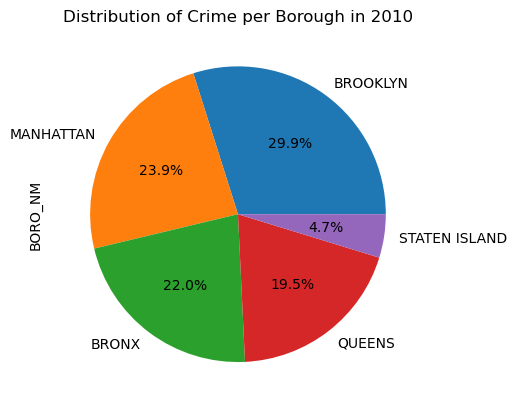

In [58]:
show_neigh_crime_pie(q2_df, 2010)

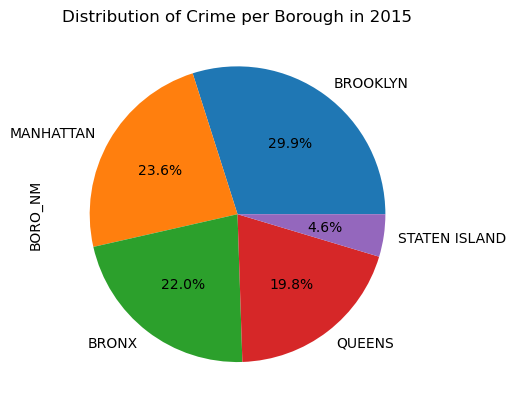

In [59]:
show_neigh_crime_pie(q2_df, 2015)

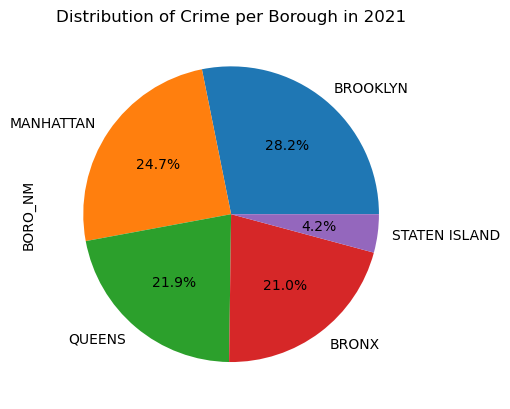

In [60]:
show_neigh_crime_pie(q2_df, 2021)

#### The stations with the most crimes

#### Most and Least commited crimes by season

In [ ]:
# sns.lineplot(df_, x= )